In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pd.read_csv("train.csv")

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Serial,Cabin
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN


# Impute nan with mean/median/mode

In [80]:
DataFrame = Data.copy()

In [81]:
print(DataFrame.Age.median())

28.0


In [83]:
def impute_nan(DataFrame, ColumnName, ImputeValue):
    DataFrame[ColumnName + "_Imputed"] = DataFrame[ColumnName].fillna(ImputeValue)


In [84]:
median = DataFrame.Age.median()
impute_nan(DataFrame, 'Age', median)

In [86]:
print(DataFrame['Age'].std())
print(DataFrame['Age_Imputed'].std())

14.526497332334044
13.019696550973194


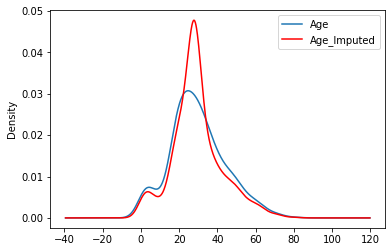

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
DataFrame['Age'].plot(kind='kde', ax=ax)
DataFrame['Age_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# Random Sample Imputation

In [88]:
DataFrame = Data.copy()

In [99]:
def impute_random_nan(Data,ColName):
    
    #Make copy of Column whose missing value need to handle
    Data[ColName+"_random"]=Data[ColName]
    
    #Select random sample value to fill the na
    # Data[ColName].dropna() - to ignore NAN values and select only from non-NAN vlaues
    random_sample = Data[ColName].dropna().sample(Data[ColName].isnull().sum(),random_state=0)
    
    # We have random_sample with replaced nan values with random values.
    # Now merge - pandas need to have same index in order to merge the dataset.
    random_sample.index = Data[Data[ColName].isnull()].index
    
    Data.loc[Data[ColName].isnull(),ColName+'_random']=random_sample

In [100]:
impute_random_nan (DataFrame, 'Age')

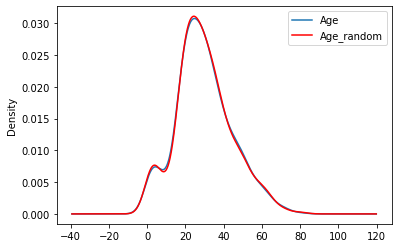

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
DataFrame['Age'].plot(kind='kde', ax=ax)
DataFrame['Age_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# Capturing NAN Values With a New Feature

In [104]:
DataFrame = Data.copy()

In [106]:
#Add new column with 1 for null values and 0 for not null values
DataFrame['Age_NAN']=np.where(DataFrame['Age'].isnull(),1,0)

In [108]:
# impute random sample values in Age column
impute_random_nan (DataFrame, 'Age')

In [111]:
DataFrame[['Age','Age_random','Age_NAN']].head(10)

,Age,Age_random,Age_NAN
0,22.0,22.0,0
1,38.0,38.0,0
2,26.0,26.0,0
3,35.0,35.0,0
4,35.0,35.0,0
5,NaN,28.0,1
6,54.0,54.0,0
7,2.0,2.0,0
8,27.0,27.0,0
9,14.0,14.0,0


In [115]:
DataFrame = DataFrame.drop('Age',axis=1)

# End Distribution Imputation

In [117]:
DataFrame = Data.copy()

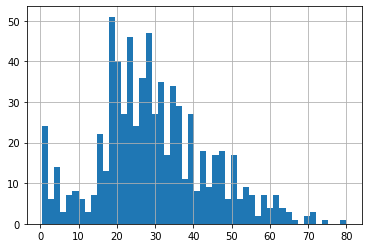

In [120]:
DataFrame.Age.hist(bins=50)


In [136]:
import seaborn as sns
from scipy.stats import norm

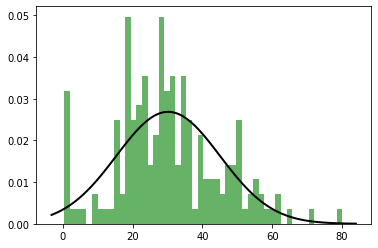

In [147]:
#Take non NAN values
NonNANData = DataFrame['Age'].dropna().sample(DataFrame['Age'].isnull().sum())
# Fit a normal distribution to the data:
mu, std = norm.fit(NonNANData)
# Plot the histogram.
plt.hist(NonNANData, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, p, 'k', linewidth=2)
plt.show()

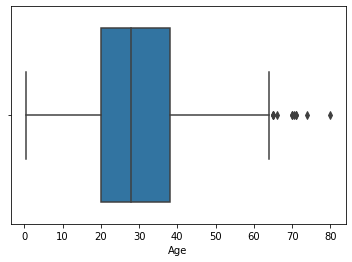

In [149]:
sns.boxplot('Age',data=DataFrame)

In [150]:
def impute_nan_TailValue(DataFrame,variable,ExtremeValue):
    DataFrame[variable+"_end_distribution"]=DataFrame[variable].fillna(extreme)
    

In [153]:
ExtremeEndTailMean = DataFrame.Age.mean()+3*DataFrame.Age.std()

In [154]:
impute_nan_TailValue(DataFrame,'Age',ExtremeEndTailMean)

Text(0.5, 1.0, 'AGE : Normal Distribution Histogram')

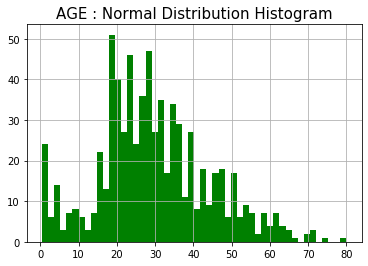

In [173]:
DataFrame.Age.hist(bins=50, color = 'g')
plt.title('AGE : Normal Distribution Histogram',fontsize=15)

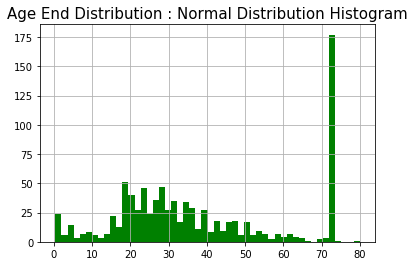

In [172]:
plt.title('Age End Distribution : Normal Distribution Histogram',fontsize=15)
DataFrame.Age_end_distribution.hist(bins=50, color = 'g')

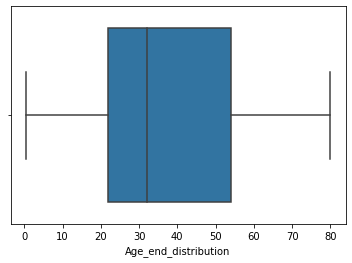

In [157]:
sns.boxplot('Age_end_distribution',data=DataFrame)


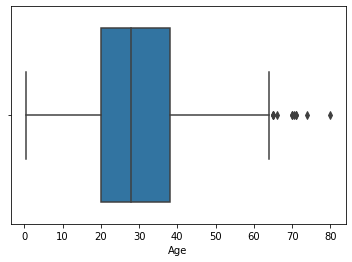

In [174]:
sns.boxplot('Age',data=DataFrame)

# Arbitary value Imputation

In [186]:
DataFrame = Data.copy()

In [187]:
def impute_nan_ArbitaryValue(df,variable, value):
    df[variable+"_"+ str(value)]=df[variable].fillna(value)


In [188]:
impute_nan_ArbitaryValue(DataFrame,'Age',0)

In [190]:
impute_nan_ArbitaryValue(DataFrame,'Age',100)

In [191]:
DataFrame

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Serial,Cabin,Age_0,Age_100
0,1,0,Third,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN,22.0,22.0
1,2,1,First,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C85,38.0,38.0
2,3,1,Third,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,26.0,26.0
3,4,1,First,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,C123,35.0,35.0
4,5,0,Third,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,Mr,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,NaN,NaN,27.0,27.0
887,888,1,First,Miss,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B,B42,19.0,19.0
888,889,0,Third,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,NaN,NaN,0.0,100.0
889,890,1,First,Mr,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,C148,26.0,26.0


In [192]:
DataFrame[['Age','Age_0','Age_100']].head(10)

,Age,Age_0,Age_100
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0
5,NaN,0.0,100.0
6,54.0,54.0,54.0
7,2.0,2.0,2.0
8,27.0,27.0,27.0
9,14.0,14.0,14.0
